In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../Data/electric_production.csv", index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', name='DATE', length=956, freq=None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 956 entries, 1939-01-01 to 2018-08-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  956 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [6]:
data.columns = ['Energy_Production']

In [7]:
data.head()

,Energy_Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [8]:
data_1985 = data[data.index.year >= int(1985)]
data_1985.head()

,Energy_Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


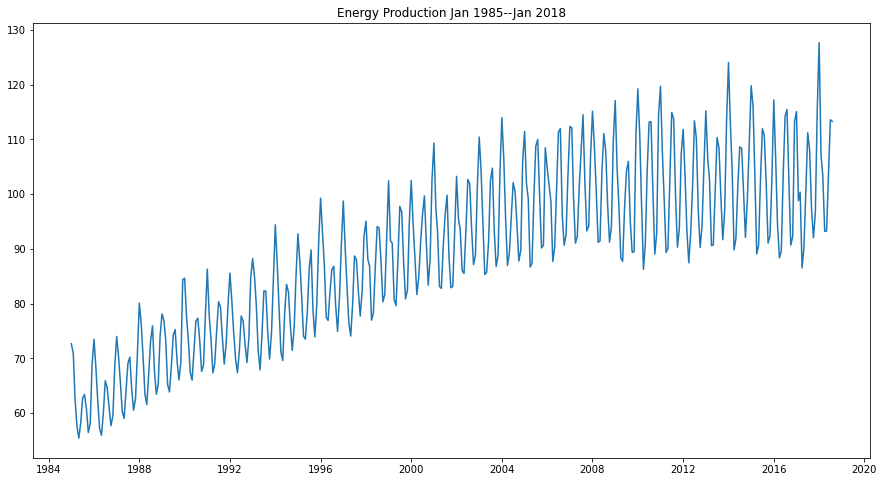

In [9]:
plt.figure(figsize=(15, 8))
plt.plot(data_1985)
plt.title("Energy Production Jan 1985--Jan 2018")
plt.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
result = seasonal_decompose(data_1985, model='multiplicative')
result

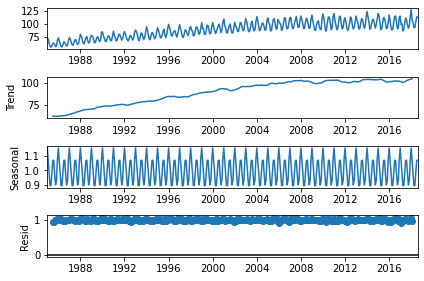

In [12]:
result.plot()
plt.show()

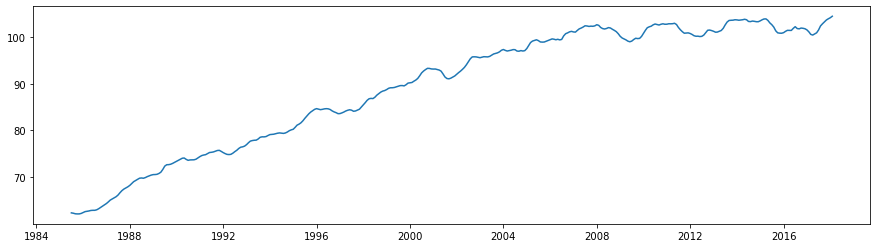

In [13]:
plt.figure(figsize=(15, 4))
plt.plot(result.trend)
plt.show()

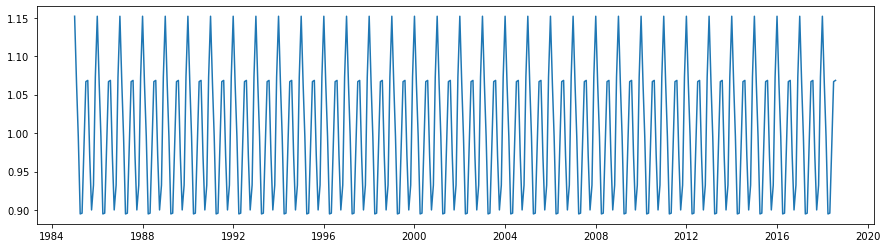

In [14]:
plt.figure(figsize=(15, 4))
plt.plot(result.seasonal)
plt.show()

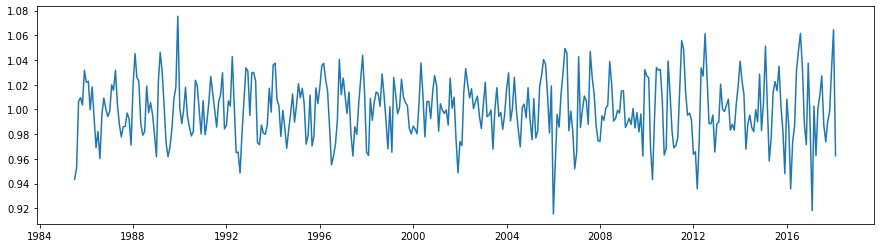

In [15]:
plt.figure(figsize=(15, 4))
plt.plot(result.resid)
plt.show()

In [16]:
from pmdarima import auto_arima

In [17]:
stepwise_model = auto_arima(data_1985, start_p=2, start_q=2, 
                            max_p=5, max_q=5, m=12, start_P=1, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1827.308, Time=1.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2055.116, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1980.491, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1876.298, Time=0.29 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1826.789, Time=0.82 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1826.372, Time=2.37 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1825.064, Time=2.64 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1812.125, Time=3.17 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=1815.973, Time=2.35 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1810.891, Time=2.72 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1824.617, Time=2.32 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1815.075, Time=1.47 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1827.134, Time=0.82 sec
 ARIMA(0,1,2)(2,1,2)[12]

In [18]:
print(stepwise_model.aic())

1809.1044498657666


In [19]:
train = data.loc['1985-01-01': '2015-01-01']
test = data.loc['2015-01-01':]

In [20]:
test.head()

,Energy_Production
DATE,
2015-01-01,119.8260
2015-02-01,116.0253
2015-03-01,103.9265
2015-04-01,89.0847
2015-05-01,90.6408


In [21]:
len(test)

44

### Bước 2 Fit mô hình

In [22]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

#### Bước 3: Dự đoán kết quả

In [23]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [24]:
future_forecast

array([109.60539924, 100.70626997,  89.71136107,  92.06894672,
       103.0375391 , 112.17579639, 111.30475971, 100.01379931,
        91.66410784,  96.12872194, 110.27753768, 118.76801793,
       108.64361993, 100.21333036,  89.93911828,  92.28891472,
       103.14679997, 113.09871333, 111.66337223,  99.99295197,
        91.75643705,  96.1008396 , 110.79629532, 119.35702616,
       109.05569576, 101.07552478,  90.27863182,  92.55439535,
       103.04898506, 112.8939981 , 111.30885852, 100.28327839,
        92.1216247 ,  97.0396631 , 110.92734526, 120.15301975,
       109.73004931, 101.87582964,  90.60725283,  92.84447217,
       103.16855092, 112.74570147, 111.22367673, 100.64891577])

In [25]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])

In [26]:
future_forecast.head()

,Prediction
DATE,
2015-01-01,109.605399
2015-02-01,100.706270
2015-03-01,89.711361
2015-04-01,92.068947
2015-05-01,103.037539


#### Bước 4: Trực quan hóa dữ liệu

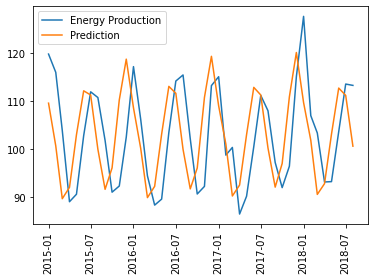

In [27]:
plt.plot(test, label='Energy Production')
plt.plot(future_forecast, label="Prediction")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

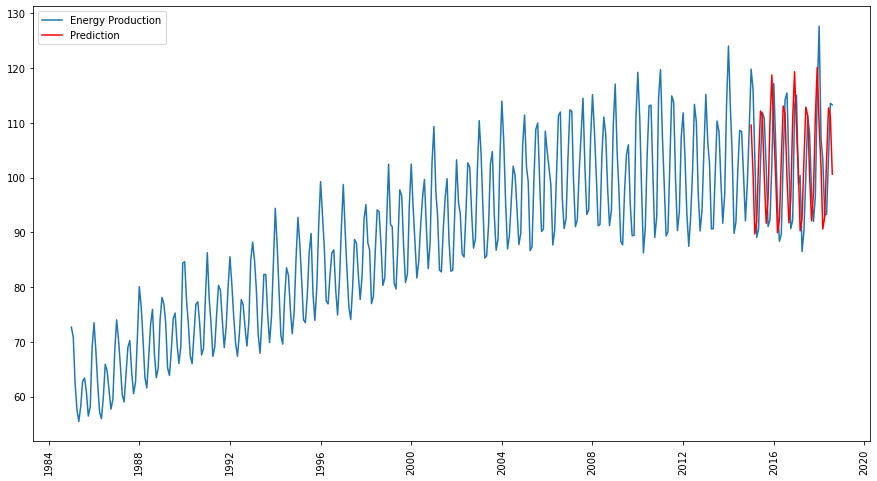

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(data_1985, label='Energy Production')
plt.plot(future_forecast, label="Prediction", color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
mae = mean_absolute_error(test, future_forecast)
mae

8.801487206713581

In [31]:
mse = mean_squared_error(test, future_forecast)
mse

102.4378022084643

#### Dự đoán 12 tháng tiếp theo

In [32]:
future_forecast = stepwise_model.predict(n_periods=len(test)+12)
future_forecast

array([109.60539924, 100.70626997,  89.71136107,  92.06894672,
       103.0375391 , 112.17579639, 111.30475971, 100.01379931,
        91.66410784,  96.12872194, 110.27753768, 118.76801793,
       108.64361993, 100.21333036,  89.93911828,  92.28891472,
       103.14679997, 113.09871333, 111.66337223,  99.99295197,
        91.75643705,  96.1008396 , 110.79629532, 119.35702616,
       109.05569576, 101.07552478,  90.27863182,  92.55439535,
       103.04898506, 112.8939981 , 111.30885852, 100.28327839,
        92.1216247 ,  97.0396631 , 110.92734526, 120.15301975,
       109.73004931, 101.87582964,  90.60725283,  92.84447217,
       103.16855092, 112.74570147, 111.22367673, 100.64891577,
        92.49915243,  97.76231789, 111.06692961, 120.63874841,
       110.19466605, 102.29364374,  90.90116452,  93.13631634,
       103.46045579, 112.91838711, 111.46946791, 100.97575598])

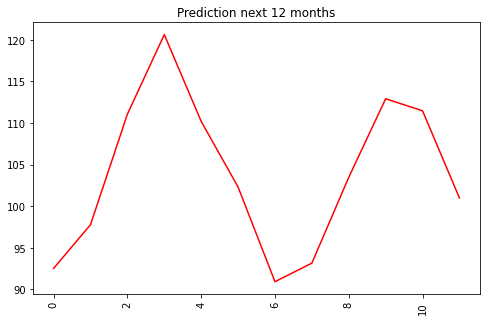

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(future_forecast[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title('Prediction next 12 months')
plt.show()

In [34]:
months = pd.date_range('2018-09-01', '2019-08-01', freq='MS').strftime('%Y-%m-%d').tolist()
months

['2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01',
 '2019-04-01',
 '2019-05-01',
 '2019-06-01',
 '2019-07-01',
 '2019-08-01']

In [35]:
new_predict = pd.DataFrame({'DATE': months,
                            'Energy_production': future_forecast[len(test):]})
new_predict

,DATE,Energy_production
0,2018-09-01,92.499152
1,2018-10-01,97.762318
2,2018-11-01,111.066930
3,2018-12-01,120.638748
4,2019-01-01,110.194666
5,2019-02-01,102.293644
6,2019-03-01,90.901165
7,2019-04-01,93.136316
8,2019-05-01,103.460456
9,2019-06-01,112.918387
